Use this notebook to generatee ROC curves for base-CNN and fine-tuned-CNN models using modhsa test data.

In [3]:
import keras
from keras import backend as K
from keras.models import load_model

import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Load data and models

In [4]:
# Declare filenames
images_filename = "../izmir-benchmark/hsapseudo_test_images.npz"
labels_filename = "../izmir-benchmark/hsapseudo_test_labels.npz" 
fine_tuned_model_filename = "../models/fine_tuned_vgg_three_modules_3x3_dense256_izmir.h5"
base_model_filename = "../models/base_vgg_three_modules_3x3_dense256_izmir.h5"

In [5]:
# Load data
# load data
img_rows, img_cols = 25, 100

images = np.load(images_filename)['arr_0']
labels = np.load(labels_filename)['arr_0']

if K.image_data_format() == 'channels_first':
    images = np.swapaxes(images, 1, 3)
    input_shape_img = (3, img_rows, img_cols)
else:
    input_shape_img = (img_rows, img_cols, 3)
images = images.astype('float32')
images /= 255
                                                                                                                                                                                                                                                                                                                                                                                                                    
binary_labels = keras.utils.to_categorical(labels, 2)


In [6]:
# Load models
fine_tuned_model = load_model(fine_tuned_model_filename)
base_model = load_model(base_model_filename)

## Generate ROC curves

In [7]:
# Predictions
fine_tuned_predicted_probs = fine_tuned_model.predict(images)
base_predicted_probs = base_model.predict(images)

In [8]:
# Roc values
roc_aucs = []
fprs = []
tprs = []
names = []

fpr, tpr, thresholds = roc_curve(labels, fine_tuned_predicted_probs[:, 1].ravel())
roc_auc = auc(fpr, tpr)
roc_aucs.append(roc_auc)
fprs.append(fpr)
tprs.append(tpr)
names.append('fine-tuned-CNN')

fpr, tpr, thresholds = roc_curve(labels, base_predicted_probs[:, 1].ravel())
roc_auc = auc(fpr, tpr)
roc_aucs.append(roc_auc)
fprs.append(fpr)
tprs.append(tpr)
names.append('base-CNN')


In [9]:
def plot_roc_curves(fprs, tprs, roc_aucs, names, colors):
    lw = 2
    plt.figure(figsize=(8,6))
    
    for i in range(len(names)):
        plt.plot(fprs[i], tprs[i], color=colors[i], lw=lw,
                 label='{0} (area = {1:0.2f})'
                 ''.format(names[i], roc_aucs[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.savefig('roc-curves.png', bbox_inches='tight')
    plt.show()

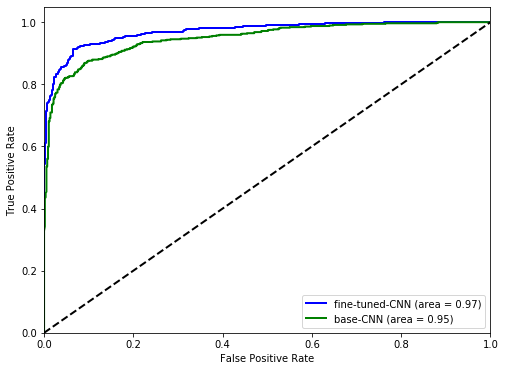

In [10]:
colors = ['blue', 'green', 'red']
plot_roc_curves(fprs, tprs, roc_aucs, names, colors)